In [43]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
customer_data = pd.read_csv("../data/raw/eci_customer_data.csv")
product_groups_data = pd.read_csv("../data/raw/eci_product_groups.csv")
product_master_data = pd.read_csv("../data/raw/eci_product_master.csv")
stores_clusters_data = pd.read_csv("../data/raw/eci_stores_clusters.csv")
transactions_data = pd.read_csv("../data/raw/eci_transactions.csv")

### Transactions

In [8]:
transactions_data.head()

,TRANSACTION_ID,DATE,STORE_ID,SKU,QUANTITY,PRICE,TOTAL_SALES,SUBGROUP,STORE_SUBGROUP_DATE_ID
0,17185,2021-01-01,S00148,CLOMEJA001,1.0,52.80,52.80,Jackets,S00148_Jackets_2021-01-01
1,4108,2021-01-01,S00035,CLOCHIN014,1.0,55.25,55.25,Infants,S00035_Infants_2021-01-01
2,2400,2021-01-01,S00020,BEAHASH005,1.0,40.19,40.19,Shampoo,S00020_Shampoo_2021-01-01
3,7978,2021-01-01,S00068,TOYGABO004,1.0,35.41,35.41,Board Games,S00068_Board Games_2021-01-01
4,6946,2021-01-01,S00059,BEAHASH006,1.0,38.28,38.28,Shampoo,S00059_Shampoo_2021-01-01


In [15]:
transactions_data.describe().round(2)

,TRANSACTION_ID,QUANTITY,PRICE,TOTAL_SALES
count,19004759.00,18909672.00,19004759.00,19004759.00
mean,9502380.00,1.44,68.69,97.37
std,5486201.51,1.01,84.06,155.90
min,1.00,1.00,4.02,4.02
25%,4751190.50,1.00,22.94,25.50
50%,9502380.00,1.00,41.24,48.01
75%,14253569.50,2.00,74.02,93.02
max,19004759.00,85.00,431.87,8369.26


In [ ]:
# Formato de fecha: AA-MM-DD
transactions_data["DATE"].unique()

array(['2021-01-01', '2021-01-02', '2021-01-03', ..., '2023-12-29',
       '2023-12-30', '2023-12-31'], dtype=object)

In [ ]:
nan_counts_transaction = transactions_data.isna().sum()
print(nan_counts_transaction)

TRANSACTION_ID                0
DATE                          0
STORE_ID                      0
SKU                           0
QUANTITY                  95087
PRICE                         0
TOTAL_SALES                   0
SUBGROUP                      0
STORE_SUBGROUP_DATE_ID        0
dtype: int64


In [ ]:
# Si la columna de Quantity es NaN, llenamos los valores de Quantitiy como Total_sales / Price
transactions_data['QUANTITY'] = transactions_data.apply(
    lambda row: row['TOTAL_SALES'] / row['PRICE'] if pd.isna(row['QUANTITY']) else row['QUANTITY'], axis=1
)

In [26]:
# Guardamos el DataFrame procesado
transactions_data.to_csv("../data/procesados/eci_transactions_data_procesado.csv", index=False)

In [ ]:
# Ejemplo demanda de un producto (CLOMEJA001)
jackets = transactions_data[transactions_data["SKU"] == "CLOMEJA001"].copy()
jackets['DATE'] = pd.to_datetime(jackets['DATE'])

# Agrupá por año y mes
jackets_mes = jackets.groupby(jackets['DATE'].dt.to_period('M'))[['PRICE', 'QUANTITY']].mean().reset_index()

In [45]:
# Regresion lineal
modelo_jackets = LinearRegression()
X = jackets_mes[['QUANTITY']]
y = jackets_mes['PRICE']
modelo_jackets.fit(X, y)
# Predicciones
pred_jackets = modelo_jackets.predict(X)

Text(0, 0.5, 'Precio Promedio Mensual')

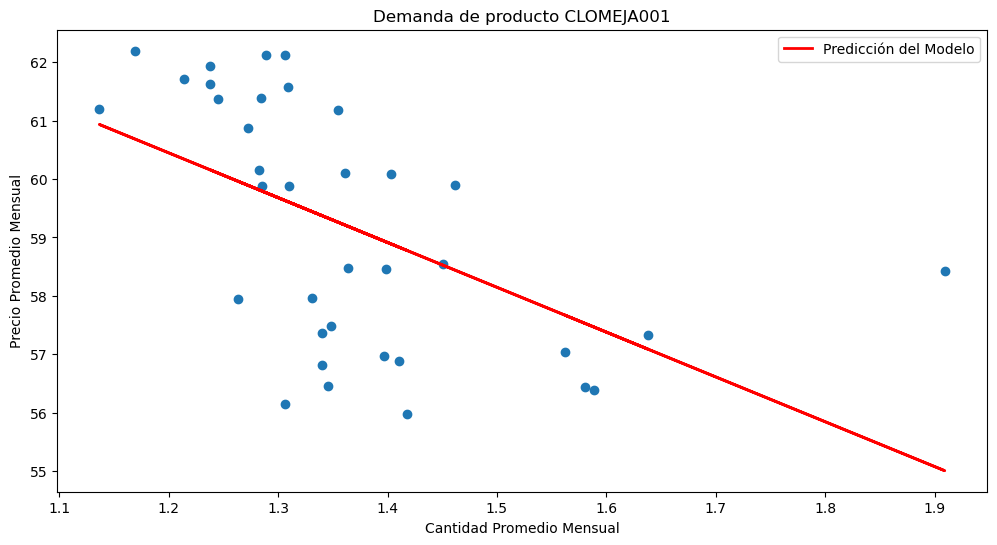

In [46]:
# Visualizar demanda de producto junto con predicciones del modelo


plt.figure(figsize=(12, 6))
plt.scatter(X, y, marker='o', linestyle='-')
plt.plot(X, pred_jackets, color='red', linewidth=2, label='Predicción del Modelo')
plt.legend()
plt.title('Demanda de producto CLOMEJA001')
plt.xlabel('Cantidad Promedio Mensual')
plt.ylabel('Precio Promedio Mensual')

### Clientes

In [3]:
customer_data.head()

,client_id,phone_number,email_address,city,state,zip_code,education_level,occupation,loyalty_member,loyalty_number,loyalty_points
0,500001,NaN,n.edwards+spam@outlook.com,Spokane,WA,99201,High School,NaN,No,NaN,339
1,500002,(412) 698-7960,lisa_cook@yahoo.com,Pittsburgh,PA,15222,High School,Sales Representative,Yes,LP525082,406
2,500003,(303) 491-3774,NaN,Fort Collins,CO,80526,College Graduate,Analyst,True,950139,14
3,500004,(803) 255-0104,betty-campbell@gmail.com,Charleston,SC,29401,Some College,Supervisor,No,NaN,NaN
4,500005,(303) 596-8987,NaN,Aurora,CO,80012,Associates,NaN,Yes,NaN,NaN


In [6]:
# Cantidad de clientes
customer_data["client_id"].nunique()

801923

### Productos

In [7]:
product_groups_data.head()

,sku,product_name,price_group_id,price_group_name,group_type
0,BOOEDTE001,PageTurn Essential Textbooks,BACK_TO_SCHOOL_01,Back to School Essentials,Seasonal
1,BOOEDTE002,Bookworm Advanced Textbooks,BACK_TO_SCHOOL_01,Back to School Essentials,Seasonal
2,BOOEDTE004,PageTurn Essential Textbooks,BACK_TO_SCHOOL_01,Back to School Essentials,Seasonal
3,CLOMESH002,DressRight Shirts Collection,BACK_TO_SCHOOL_01,Back to School Essentials,Seasonal
4,CLOMESH005,StyleX Relaxed Shirts,BACK_TO_SCHOOL_01,Back to School Essentials,Seasonal


In [8]:
len(product_groups_data)

80

In [18]:
product_groups_data.isna().sum()

sku                                   0
 product_name                         0
 price_group_id                       0
 price_group_name                     0
 group_type                           0
dtype: int64

In [9]:
product_master_data.head()

,sku,product_name,category,group,subgroup,brand,base_price,initial_ticket_price,costos
0,ELECOLA001,TechPro Laptops Smart 2025,Electronics,Computing,Laptops,TechPro,284.94,355.14,225.84
1,ELECOLA002,Electra Laptops Ultra Pro,Electronics,Computing,Laptops,Electra,311.83,352.74,209.99
2,ELECOLA003,CircuitCity Laptops Air 2024,Electronics,Computing,Laptops,CircuitCity,246.96,301.35,192.61
3,ELECOLA004,TechPro Laptops Elite 2025,Electronics,Computing,Laptops,TechPro,324.96,420.49,212.23
4,ELECOLA005,CircuitCity Laptops Pro S,Electronics,Computing,Laptops,CircuitCity,339.88,386.23,231.75


In [14]:
product_master_data.describe().round(2)

,base_price,initial_ticket_price,costos
count,861.00,861.00,861.00
mean,70.97,85.10,44.63
std,85.53,102.75,63.73
min,8.02,8.88,5.76
25%,24.30,28.72,11.25
50%,43.00,50.58,20.04
75%,77.95,93.29,45.93
max,358.79,452.69,281.26


In [19]:
product_master_data.isna().sum()

sku                     0
product_name            0
category                0
group                   0
subgroup                0
brand                   0
base_price              0
initial_ticket_price    0
costos                  0
dtype: int64

### Stores

In [11]:
stores_clusters_data.head()

,STORE_ID,BRAND,STORE_NAME,CLUSTER
0,S00001,PrimeGoods,PrimeGoods - Hillsboro,Cluster_West_Coast
1,S00002,MegaShop,MegaShop Indianapolis Eastside,Midwest_Cluster
2,STORE0003,MarketExpress,MarketExpress - Las Vegas,Mountain_Cluster
3,STORE0004,MegaShop,MegaShop - Oklahoma City,Texas_Cluster
4,S00005,PrimeGoods,PrimeGoods - Charlotte,NC_Cluster


In [12]:
stores_clusters_data.describe()

,STORE_ID,BRAND,STORE_NAME,CLUSTER
count,157,157,157,140
unique,157,9,144,13
top,S00001,EssentialsPlus,EssentialsPlus - Spartanburg,Cluster_West_Coast
freq,1,25,3,16


In [21]:
stores_clusters_data.isna().sum()

STORE_ID       0
BRAND          0
STORE_NAME     0
CLUSTER       17
dtype: int64